In [1]:
# pip install konlpy wordcloud matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#pip install konlpy wordcloud

In [6]:
#pip install wordcloud

In [1]:
import pandas as pd
from collections import Counter

In [2]:
df = pd.read_csv('Good_Point_df_1.csv', encoding='cp949')

# 분류

In [3]:
category_map = {
    "시설 및 편의성": [
        "관리가 잘 되어있어요", "편의시설이 잘 되어있어요", "화장실이 깨끗해요",
        "대중교통이 편해요", "주차하기 편해요", "샤워실이 잘 되어있어요", "숙박하기 좋아요",
        "시설이 깔끔해요", "부대시설이 잘 되어있어요", "공용시설 관리가 잘돼요", "온수가 잘 나와요",
        "매너타임이 잘 지켜져요", "개수대가 잘 되어있어요", "냉난방이 잘돼요", "전기 사용이 편해요",
        "마트 이용이 편해요", "취사시설이 잘 되어있어요", "방음이 잘돼요", "침구가 좋아요",
        "보안시설이 잘 되어있어요", "대여장비 상태가 좋아요", "휴게공간이 잘 되어있어요",
        "대기공간이 잘 되어있어요", "기구가 청결해요", "반납이 편해요", "취식 공간이 잘 되어있어요",
        "파우더룸이 잘 되어있어요", "연습공간이 잘 되어있어요", "수면실이 잘 되어있어요",
        "노천탕이 잘 되어있어요", "탕이 넓어요", "수질 관리가 잘돼요", "셔틀버스가 잘 되어있어요",
        "사이트 간격이 넓어요", "벌레 걱정 없어요", "화장실이 잘 되어있어요", "규모가 커요", "반려동물과 가기 좋아요"
        ,"카페 같은 분위기에요", '방문객이 많아요','공간이 넓어요','전시 구성이 알차요', '깨끗해요','바비큐 해먹기 좋아요',
        '그늘이 많아요','물이 따뜻해요','수심이 다양해요','물이 깨끗해요', '책 읽기 쾌적해요', '대화하기 좋아요', '집중하기 좋아요',
        '조용히 쉬기 좋아요', '원하는 책을 찾기 쉬워요', '오래 머무르기 좋아요', '좌석이 편해요', '최신 장비를 사용해요',
        '행사 상품이 다양해요', '배달 시스템이 편리해요','분위기가 편안해요','매장이 청결해요',"근처에 갈 곳이 많아요", "대중교통이 편해요", "근처에 식당이 많아요"
    ],
    "활동 및 즐길거리": [
        "볼거리가 많아요", "체험 프로그램이 다양해요", "먹거리가 풍부해요", "놀이기구가 다양해요",
        "야시장이 잘 되어있어요", "물놀이하기 좋아요", "파티하기 좋아요", "공연이 재밌어요",
        "강습 받기 좋아요", "책 종류가 다양해요", "특이한 찜질방이 있어요",
        "놀거리가 많아요", "야외에서 놀기 좋아요", "커플로 맞추기 좋아요", "즐길 거리가 많아요", "고기 질이 좋아요",
        "그늘집이 잘 되어있어요", "맞춤 지도를 잘해줘요", "스타일 추천을 잘해줘요", "자연스럽게 연출해줘요",
        "세트장 구성이 다양해요", "다양하게 연출하기 좋아요",
        "프로그램이 다양해요", "초보자에게도 적합해요","산책로가 잘 되어있어요", "신기한 식물이 많아요",
        "피크닉하기 좋아요","슬로프가 길어요", "아이와 가기 좋아요", "유익해요", "물놀이하기 좋아요", "재미있는 테마가 많아요",
        "스토리가 탄탄해요", "문제가 신선해요", '컨셉이 독특해요','전시 테마가 재밌어요', '사진 컨셉이 다양해요', '특별한 날 가기 좋아요'
    ],
    "경관 및 사진": [
        "뷰가 좋아요", "사진이 잘 나와요", "야경이 멋져요", "경관이 독특해요", "자연 경관이 좋아요",
        "야외 공간이 멋져요", "채광이 좋아요", "인테리어가 멋져요", "독특한 디자인이 많아요",
        "아기자기해요", "고급스러워요", "예쁜 소품이 많아요", "트렌디해요", "아늑해요",
        "카페 같은 분위기에요", "소품이 다양해요"
    ],
    "서비스": [
        "친절해요", "안전하게 관리해요", "추천을 잘해줘요", "예약이 편리해요", "설명이 잘 되어있어요",
        "상담이 자세해요", "손이 빨라요", "관리법을 잘 알려줘요", "맞춤 케어를 잘해줘요",
        "과도한 권유가 없어요", "관리 효과가 좋아요", "가격 안내가 명확해요", "대화가 즐거워요",
        "필요한 대화만 오가요", "서비스가 좋아요", "픽업서비스가 편해요", "A/S가 세심해요",
        "설명이 자세해요", "배송 시스템이 편리해요", "할인/적립을 잘 챙겨줘요", "맞춤 제작을 잘해줘요", "유익해요", "선생님이 열정적이에요",
        "수업이 체계적이에요", "세신사의 실력이 좋아요", "학생과 소통을 잘해요", '포장이 정성스러워요',
        '주문제작을 잘해줘요','보정을 꼼꼼하게 해줘요', '캐디의 진행이 매끄러워요', '예약 시간을 잘 지켜요',
        '거리 측정을 잘해줘요', '검안이 꼼꼼해요', '시술이 꼼꼼해요', '원하는 스타일로 잘해줘요', '자연스러워요',
        '선생님 실력이 좋아요','소수정예에요'
    ],
    "가격 및 가치": [
        "가격이 합리적이에요", "가성비가 좋아요", "품질이 좋아요", "비싼 만큼 가치있어요"
    ],
    "쇼핑 관련": [
        "특색 있는 제품이 많아요", "매장이 넓어요", "신상품이 많아요", "사이즈가 다양해요",
        "옷이 예뻐요", "옷 관리가 잘 되어있어요", "옷이 다양해요", "독특한 의상이 많아요",
        "키덜트족에게 좋아요", "좋은 제품을 사용해요", "과채가 신선해요",
        "종류가 다양해요", "베스트셀러가 많아요", "신간이 빨리 들어와요", '상품이 다양해요', '선물하기 좋아요','트렌디한 상품이 많아요'
        , "맞춤 제작을 잘해요","예쁜 아기 의상이 많아요", "독특한 책이 많아요"
    ],
    "기타": [
        "코스가 길어요", "혼밥하기 좋아요","코스가 변별력 있어요",
        "필드 상태가 좋아요", "클럽하우스가 잘 되어있어요",'붐비지 않아요','대기시간이 짧아요', '재료가 신선해요', '피팅이 자유로워요'
    ]
}

# "방음이 잘돼요", "침구가 좋아요"
#"음식 및 음료": ["음식이 맛있어요",'피팅이 자유로워요','양이 많아요 ,"즉석조리 식품이 맛있어요", "과채가 신선해요", "고기 질이 좋아요","특별한 메뉴가 있어요", "디저트가 맛있어요", "커피가 맛있어요", "음식이 맛있어요", "즉석조리 식품이 맛있어요"],

In [4]:
def update_categories(df, category_map):
    for category, keywords in category_map.items():
        for keyword in keywords:
            df.loc[df['Good_Point'].str.contains(keyword), 'Category_Map'] = category
    return df

df = update_categories(df, category_map)

In [5]:
# 단일적인 음식 관련된것은 일부로 뺐음.
df[df['Category_Map'].isnull()]

,Good_Point,Category_Map
62,음료가 맛있어요,NaN
65,특별한 메뉴가 있어요,NaN
66,디저트가 맛있어요,NaN
120,커피가 맛있어요,NaN
139,음식이 맛있어요,NaN
143,즉석조리 식품이 맛있어요,NaN
173,양이 많아요,NaN
182,즉석커피가 맛있어요,NaN


In [6]:
df = df.dropna(axis=0)

In [8]:
df2 = pd.read_csv('관광_goodpoint_1.csv', encoding='cp949')
df_dup = df2['Good_Point'].drop_duplicates().reset_index()
df2.columns
Attraction_df = df2[['Attraction', 'Good_Point', 'Selected_People']]
Attraction_df

,Attraction,Good_Point,Selected_People
0,동대문역사문화공원,뷰가 좋아요,22
1,동대문역사문화공원,관리가 잘 되어있어요,21
2,동대문역사문화공원,볼거리가 많아요,14
3,동대문역사문화공원,사진이 잘 나와요,12
4,동대문역사문화공원,산책로가 잘 되어있어요,12
...,...,...,...
5031,한국금융사박물관,설명이 잘 되어있어요,2
5032,한국금융사박물관,주차하기 편해요,2
5033,한국금융사박물관,가격이 합리적이에요,1
5034,한국금융사박물관,체험 프로그램이 다양해요,1


In [11]:
merged_df = Attraction_df.merge(df[['Good_Point', 'Category_Map']], on='Good_Point', suffixes=('_attraction', '_df'))
Attraction_2 = merged_df.copy()
Attraction_2

,Attraction,Good_Point,Selected_People,Category_Map
0,동대문역사문화공원,뷰가 좋아요,22,경관 및 사진
1,동대문역사문화공원,관리가 잘 되어있어요,21,시설 및 편의성
2,동대문역사문화공원,볼거리가 많아요,14,활동 및 즐길거리
3,동대문역사문화공원,사진이 잘 나와요,12,경관 및 사진
4,동대문역사문화공원,산책로가 잘 되어있어요,12,활동 및 즐길거리
...,...,...,...,...
5017,한국금융사박물관,설명이 잘 되어있어요,2,서비스
5018,한국금융사박물관,주차하기 편해요,2,시설 및 편의성
5019,한국금융사박물관,가격이 합리적이에요,1,가격 및 가치
5020,한국금융사박물관,체험 프로그램이 다양해요,1,활동 및 즐길거리


In [12]:
# Attraction_2.to_csv('네이버_관광_리뷰.csv', encoding='cp949',index=False)

In [13]:
Attraction_2['Good_Point_Split_1'] = Attraction_2['Good_Point'].str.split(' ').str[0]
Attraction_2['Good_Point_Split_2'] = Attraction_2['Good_Point'].str.split(' ').str[1]
Attraction_2['Good_Point_Split_3'] = Attraction_2['Good_Point'].str.split(' ').str[2]
Attraction_2['Good_Point_Split_4'] = Attraction_2['Good_Point'].str.split(' ').str[3]

In [14]:
Attraction_2

,Attraction,Good_Point,Selected_People,Category_Map,Good_Point_Split_1,Good_Point_Split_2,Good_Point_Split_3,Good_Point_Split_4
0,동대문역사문화공원,뷰가 좋아요,22,경관 및 사진,뷰가,좋아요,NaN,NaN
1,동대문역사문화공원,관리가 잘 되어있어요,21,시설 및 편의성,관리가,잘,되어있어요,NaN
2,동대문역사문화공원,볼거리가 많아요,14,활동 및 즐길거리,볼거리가,많아요,NaN,NaN
3,동대문역사문화공원,사진이 잘 나와요,12,경관 및 사진,사진이,잘,나와요,NaN
4,동대문역사문화공원,산책로가 잘 되어있어요,12,활동 및 즐길거리,산책로가,잘,되어있어요,NaN
...,...,...,...,...,...,...,...,...
5017,한국금융사박물관,설명이 잘 되어있어요,2,서비스,설명이,잘,되어있어요,NaN
5018,한국금융사박물관,주차하기 편해요,2,시설 및 편의성,주차하기,편해요,NaN,NaN
5019,한국금융사박물관,가격이 합리적이에요,1,가격 및 가치,가격이,합리적이에요,NaN,NaN
5020,한국금융사박물관,체험 프로그램이 다양해요,1,활동 및 즐길거리,체험,프로그램이,다양해요,NaN


In [15]:
Attraction_2.columns

Index(['Attraction', 'Good_Point', 'Selected_People', 'Category_Map',
       'Good_Point_Split_1', 'Good_Point_Split_2', 'Good_Point_Split_3',
       'Good_Point_Split_4'],
      dtype='object')

In [16]:
Attraction_3 = Attraction_2[['Attraction', 'Good_Point',
       'Good_Point_Split_1', 'Good_Point_Split_2', 'Good_Point_Split_3',
       'Good_Point_Split_4','Category_Map', 'Selected_People']]

In [17]:
Attraction_3

,Attraction,Good_Point,Good_Point_Split_1,Good_Point_Split_2,Good_Point_Split_3,Good_Point_Split_4,Category_Map,Selected_People
0,동대문역사문화공원,뷰가 좋아요,뷰가,좋아요,NaN,NaN,경관 및 사진,22
1,동대문역사문화공원,관리가 잘 되어있어요,관리가,잘,되어있어요,NaN,시설 및 편의성,21
2,동대문역사문화공원,볼거리가 많아요,볼거리가,많아요,NaN,NaN,활동 및 즐길거리,14
3,동대문역사문화공원,사진이 잘 나와요,사진이,잘,나와요,NaN,경관 및 사진,12
4,동대문역사문화공원,산책로가 잘 되어있어요,산책로가,잘,되어있어요,NaN,활동 및 즐길거리,12
...,...,...,...,...,...,...,...,...
5017,한국금융사박물관,설명이 잘 되어있어요,설명이,잘,되어있어요,NaN,서비스,2
5018,한국금융사박물관,주차하기 편해요,주차하기,편해요,NaN,NaN,시설 및 편의성,2
5019,한국금융사박물관,가격이 합리적이에요,가격이,합리적이에요,NaN,NaN,가격 및 가치,1
5020,한국금융사박물관,체험 프로그램이 다양해요,체험,프로그램이,다양해요,NaN,활동 및 즐길거리,1


## Good_Point Counter : 선택 사람 합

In [18]:
Good_Point_Counts = Attraction_3[['Good_Point','Selected_People']]

In [19]:
Good_Point_Counts[Good_Point_Counts['Good_Point']=='볼거리가 많아요']

,Good_Point,Selected_People
2,볼거리가 많아요,14
16,볼거리가 많아요,2666
35,볼거리가 많아요,1190
51,볼거리가 많아요,98
74,볼거리가 많아요,718
...,...,...
4798,볼거리가 많아요,84
4838,볼거리가 많아요,8
4930,볼거리가 많아요,4
4966,볼거리가 많아요,41


In [20]:
Good_Point_Counts_2 = Good_Point_Counts.groupby('Good_Point', as_index=False).sum()

In [21]:
Good_Point_Counts_2

,Good_Point,Selected_People
0,A/S가 세심해요,712
1,가격 안내가 명확해요,7
2,가격이 합리적이에요,21227
3,가성비가 좋아요,11808
4,강습 받기 좋아요,379
...,...,...
178,행사 상품이 다양해요,55
179,혼밥하기 좋아요,1
180,화장실이 깨끗해요,2177
181,화장실이 잘 되어있어요,1436


In [22]:
Good_Point_Counts_2[Good_Point_Counts_2['Good_Point'] == '뷰가 좋아요']

,Good_Point,Selected_People
66,뷰가 좋아요,25663


## 선택 사람 기준으로 정렬

In [23]:
G_P_Sorted_Counts= Good_Point_Counts_2.sort_values(by='Selected_People', ascending=False)

In [24]:
G_P_Sorted_Counts

,Good_Point,Selected_People
62,볼거리가 많아요,48927
71,사진이 잘 나와요,33511
136,주차하기 편해요,30136
96,시설이 깔끔해요,28096
148,친절해요,28022
...,...,...
149,침구가 좋아요,1
94,스토리가 탄탄해요,1
179,혼밥하기 좋아요,1
133,좋은 제품을 사용해요,1


In [25]:
Attraction_Split = Attraction_3.copy()

In [26]:
Attraction_Split.columns

Index(['Attraction', 'Good_Point', 'Good_Point_Split_1', 'Good_Point_Split_2',
       'Good_Point_Split_3', 'Good_Point_Split_4', 'Category_Map',
       'Selected_People'],
      dtype='object')

In [27]:
# 필요한 컬럼만 쓰기
Attraction_Split_1 = Attraction_Split[['Good_Point_Split_1', 'Good_Point_Split_2',
       'Good_Point_Split_3', 'Good_Point_Split_4','Selected_People']]

In [28]:
Attraction_Split_1

,Good_Point_Split_1,Good_Point_Split_2,Good_Point_Split_3,Good_Point_Split_4,Selected_People
0,뷰가,좋아요,NaN,NaN,22
1,관리가,잘,되어있어요,NaN,21
2,볼거리가,많아요,NaN,NaN,14
3,사진이,잘,나와요,NaN,12
4,산책로가,잘,되어있어요,NaN,12
...,...,...,...,...,...
5017,설명이,잘,되어있어요,NaN,2
5018,주차하기,편해요,NaN,NaN,2
5019,가격이,합리적이에요,NaN,NaN,1
5020,체험,프로그램이,다양해요,NaN,1


In [29]:
# Counter 객체 생성
counter = Counter()

# 데이터 프레임의 각 행을 반복
for i, row in Attraction_Split_1.iterrows():
    selected_people = row['Selected_People']    # 현재 행의 Selected_People 값
    for col in ['Good_Point_Split_1', 'Good_Point_Split_2', 'Good_Point_Split_3', 'Good_Point_Split_4']:
        word = row[col]                         # 현재 열의 단어
        if pd.notna(word):                      # 단어가 NaN이 아닌 경우에만
            counter[word] += selected_people    # Counter에 단어를 키로 하고 Selected_People 값을 더함

# Counter 객체를 데이터 프레임으로 변환
result_df = pd.DataFrame(counter.items(), columns=['Word', 'Total_Selected_People'])

In [30]:
# 결과 출력
result_df

,Word,Total_Selected_People
0,뷰가,25663
1,좋아요,76672
2,관리가,19117
3,잘,81926
4,되어있어요,47634
...,...,...
274,적합해요,13
275,선생님,8
276,소수정예에요,4
277,좋은,1


In [31]:
result_nouns = result_df['Word'].tolist()

In [46]:
# !pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 14.6 MB/s eta 0:00:00


In [47]:
from konlpy.tag import Okt
from konlpy.tag import Hannanum

nlp = Okt()
# 리스트의 각 요소에 대해 명사 추출
all_nouns = [nlp.nouns(word) for word in result_nouns]

## 명사만 추출

In [48]:
from konlpy.tag import Okt
from konlpy.tag import Hannanum

In [49]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import font_manager, rc
from konlpy.tag import Hannanum

# Counter 객체 생성
counter = Counter()

# Hannanum 형태소 분석기 객체 생성
hannanum = Hannanum()

# 데이터 프레임의 각 행을 반복
for i, row in Attraction_Split_1.iterrows():
    selected_people = row['Selected_People']  # 현재 행의 Selected_People 값
    for col in ['Good_Point_Split_1', 'Good_Point_Split_2', 'Good_Point_Split_3', 'Good_Point_Split_4']:
        word = row[col]
        if pd.notna(word):
            # 형태소 분석을 통해 명사만 추출
            nouns = hannanum.nouns(word)
            for noun in nouns:
                counter[noun] += selected_people  # Counter에 명사를 키로 하고 Selected_People 값을 더함

# Counter 객체를 데이터 프레임으로 변환
result_df = pd.DataFrame(counter.items(), columns=['Word', 'Total_Selected_People'])

# 결과 출력
print(result_df)

     Word  Total_Selected_People
0       뷰                  25669
1     관리가                  19120
2       되                  47640
3     볼거리                  48929
4      사진                  33570
..    ...                    ...
205   열정적                     86
206  연습공간                     14
207   초보자                     13
208    적합                     13
209  소수정예                      4

[210 rows x 2 columns]


In [50]:
!apt-get install fonts-nanum -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


## 상위 50개 추출 ('되' 제거)

In [106]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum

# Counter 객체 생성
counter = Counter()

# Hannanum 형태소 분석기 객체 생성
hannanum = Hannanum()

# 데이터 프레임의 각 행을 반복
for i, row in Attraction_Split_1.iterrows():
    selected_people = row['Selected_People']  # 현재 행의 Selected_People 값
    for col in ['Good_Point_Split_1', 'Good_Point_Split_2', 'Good_Point_Split_3', 'Good_Point_Split_4']:
        word = row[col]
        if pd.notna(word):
            # 형태소 분석을 통해 명사만 추출
            nouns = hannanum.nouns(word)
            for noun in nouns:
                # 형태소가 '되'가 아니면서 품사가 명사인 경우에만 카운트
                if 'N' in hannanum.pos(noun)[0]:
                    if noun != '되':  # '되'를 제외
                        counter[noun] += selected_people  # Counter에 명사를 키로 하고 Selected_People 값을 더함

# Counter 객체를 데이터 프레임으로 변환
result_df = pd.DataFrame(counter.items(), columns=['Word', 'Total_Selected_People'])

# 상위 51개 데이터만 선택
result_df = result_df.head(51)

# 결과 출력
print(result_df)


     Word  Total_Selected_People
0       뷰                  25669
1     관리가                  19120
2     볼거리                  48929
3      사진                  33570
4     나와요                  33716
5     산책로                  10749
6    편의시설                   4737
7     먹거리                   9734
8      풍부                   9734
9      가격                  21240
10    합리적                  21233
11    방문객                   1453
12     체험                  12399
13   프로그램                  12451
14     다양                  81946
15   주차하기                  30121
16     컨셉                   1039
17     독특                   1496
18     유익                  10245
19    신기한                   2962
20     식물                   2962
21    화장실                   3613
22     깨끗                   4593
23   대중교통                   3822
24     규모                  15775
25  피크닉하기                    523
26   인테리어                    931
27   반려동물                    249
28     야경                   6757
29     근처 

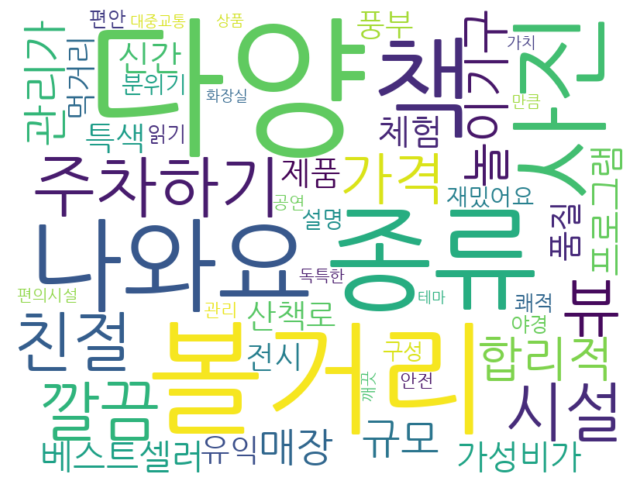

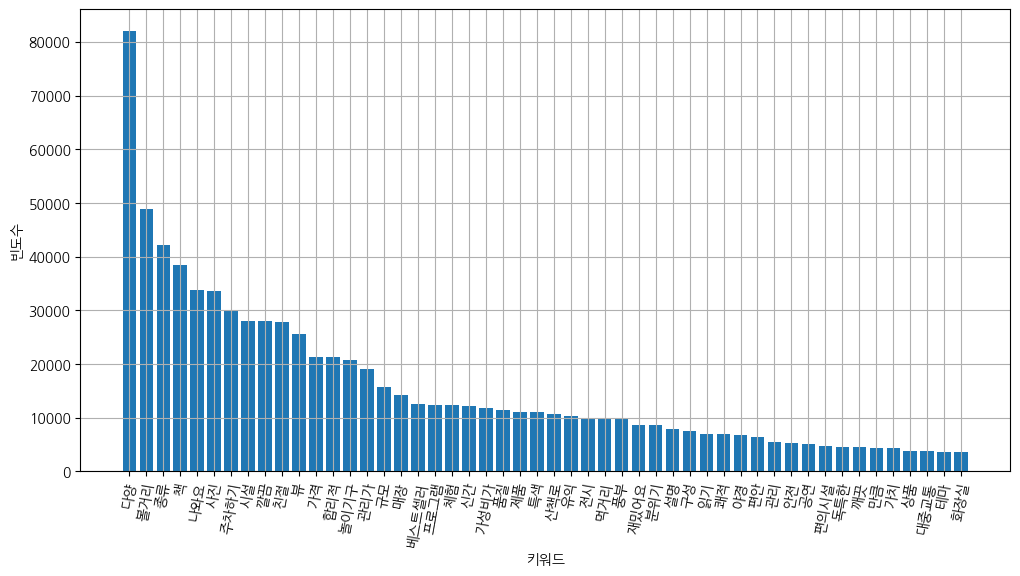

In [109]:
# Counter 객체에서 상위 50개의 데이터만 선택
top_50_counter = counter.most_common(50)
top_50_dict = dict(top_50_counter)

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=600,
    background_color='white'
)

# WordCloud를 만들기 위해 Counter 객체를 딕셔너리로 변환
wordcloud.generate_from_frequencies(top_50_dict)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 빈도수 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

# 키워드를 빈도수 기준으로 정렬
sorted_keys = [pair[0] for pair in top_50_counter]
sorted_values = [pair[1] for pair in top_50_counter]

# 막대 그래프 그리기
plt.bar(range(len(top_50_dict)), sorted_values, align='center')
plt.xticks(range(len(top_50_dict)), sorted_keys, rotation=80)
plt.show()

### 워드클라우드 그려보기

### 명사만 그려보기

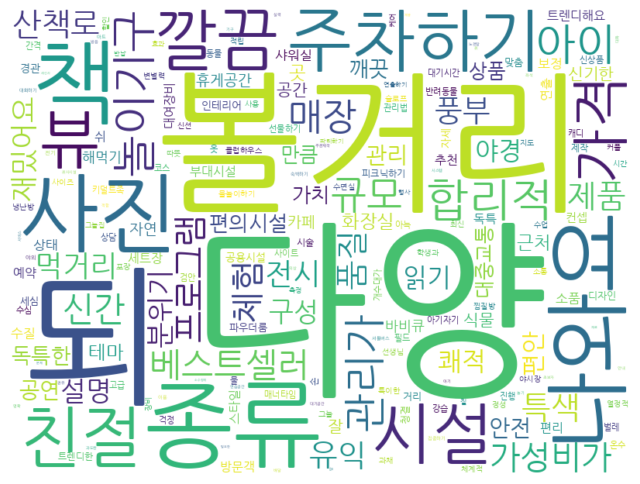

In [51]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import font_manager, rc


review_total = result_df.copy()

# 'counts' 열의 데이터 형식을 정수형으로 변환
review_total['Total_Selected_People'] = review_total['Total_Selected_People'].astype(int)

# unique_word와 counts를 딕셔너리로 변환
wc = dict(zip(review_total['Word'].astype('str'), review_total['Total_Selected_People'].astype('int')))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='NanumGothic',
    width=800,
    height=600,
    #max_font_size=100,
    background_color='white'
)

wordcloud.generate_from_frequencies(wc)  # generate_from_frequencies() 함수 사용

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

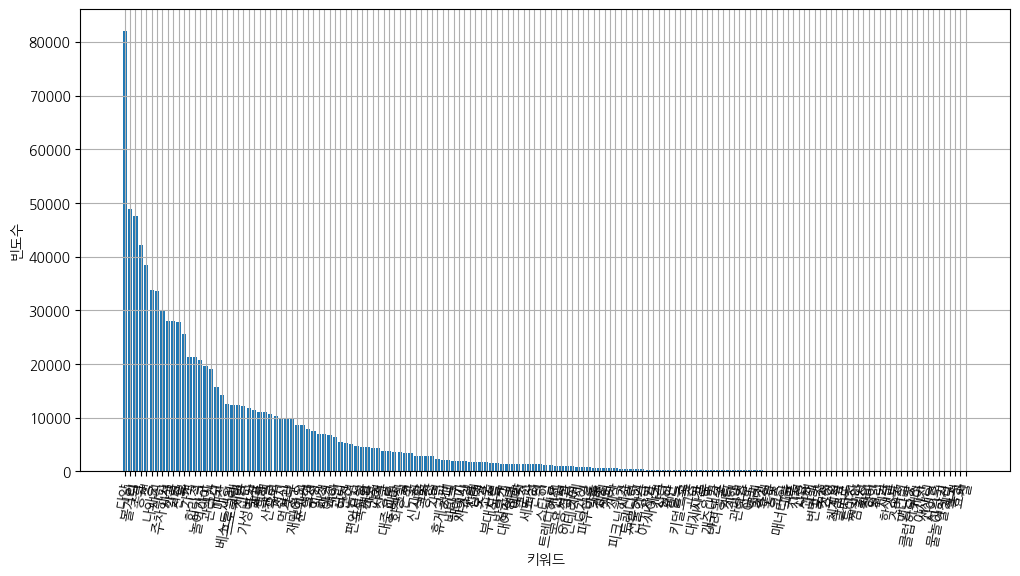

In [52]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# matplotlib에 폰트 설정
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

review_total = result_df.copy()

# 'Total_Selected_People' 열의 데이터 형식을 정수형으로 변환
review_total['Total_Selected_People'] = review_total['Total_Selected_People'].astype(int)


# 75번째 백분위수 값 계산 (상위 25% 값)
quantile_25 = review_total['Total_Selected_People'].quantile(0.25)


filtered_df = review_total[review_total['Total_Selected_People'] >= quantile_25]

# Word와 Total_Selected_People를 딕셔너리로 변환
wc = dict(zip(filtered_df['Word'].astype('str'), filtered_df['Total_Selected_People'].astype('int')))

# 빈도수 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

# 키워드를 빈도수 기준으로 정렬
sorted_keys = sorted(wc, key=wc.get, reverse=True)
sorted_values = sorted(wc.values(), reverse=True)

# 막대 그래프 그리기
plt.bar(range(len(wc)), sorted_values, align='center')
plt.xticks(range(len(wc)), sorted_keys, rotation=80)
plt.show()

In [53]:
# count 기준으로 정렬
result_df_1 = result_df.sort_values(by='Total_Selected_People', ascending=False)

In [54]:
# result_df_1.to_csv('Word_Select_People.csv', encoding='cp949')

In [55]:
result_df['Total_Selected_People'].describe()

count      210.000000
mean      4450.114286
std      10180.705257
min          1.000000
25%         62.750000
50%        304.000000
75%       3452.000000
max      81946.000000
Name: Total_Selected_People, dtype: float64

In [56]:
G_P_Sorted_Counts

,Good_Point,Selected_People
62,볼거리가 많아요,48929
71,사진이 잘 나와요,33514
136,주차하기 편해요,30121
96,시설이 깔끔해요,28073
148,친절해요,27891
...,...,...
173,픽업서비스가 편해요,1
149,침구가 좋아요,1
127,재미있는 테마가 많아요,1
133,좋은 제품을 사용해요,1


### 분리 안한거 그려보기

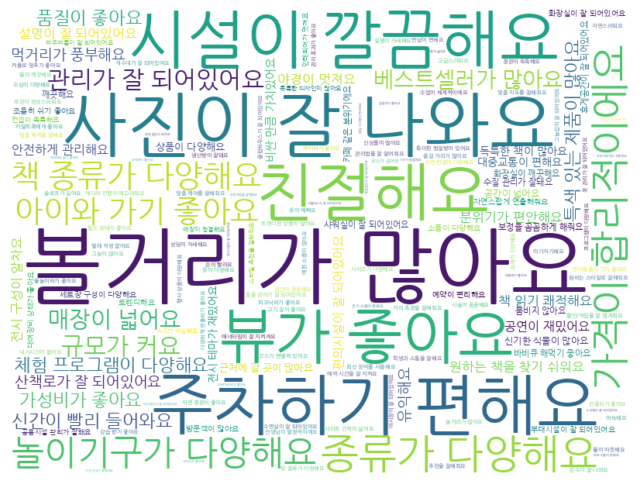

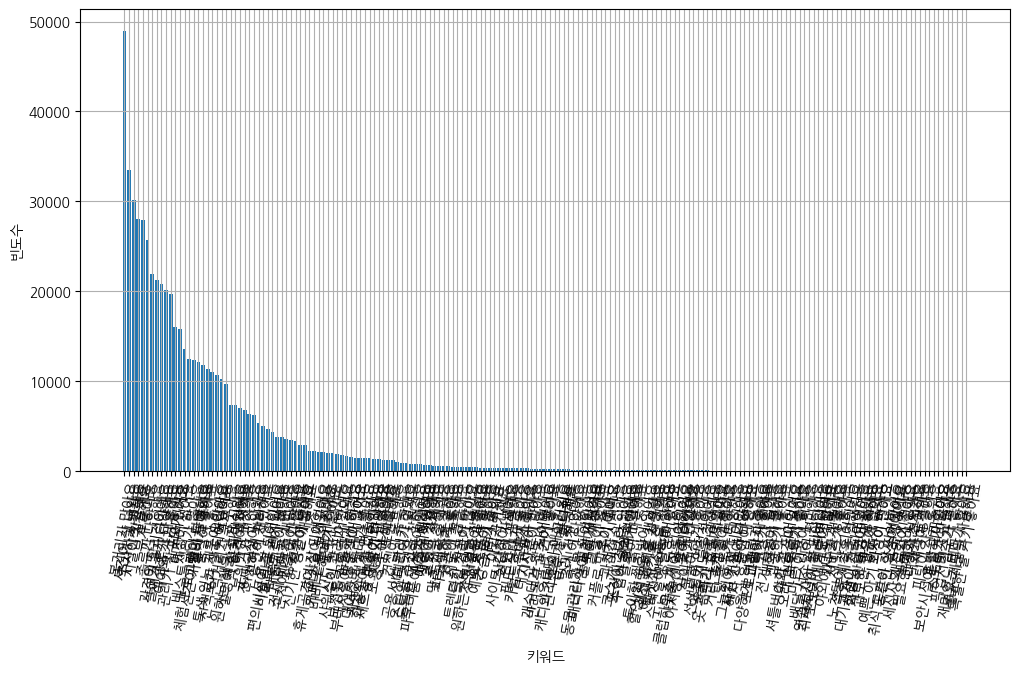

In [57]:
# 'Selected_People' 값이 1 이상인 데이터만 필터링
filtered_df = G_P_Sorted_Counts[G_P_Sorted_Counts['Selected_People'] >= 1]

# Good_Point와 Selected_People를 딕셔너리로 변환
wc = dict(zip(filtered_df['Good_Point'].astype('str'), filtered_df['Selected_People'].astype('int')))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=600,
    background_color='white'
)

wordcloud.generate_from_frequencies(wc)  # generate_from_frequencies() 함수 사용

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 빈도수 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

# 키워드를 빈도수 기준으로 정렬
sorted_keys = sorted(wc, key=wc.get, reverse=True)
sorted_values = sorted(wc.values(), reverse=True)

# 막대 그래프 그리기
plt.bar(range(len(wc)), sorted_values, align='center')
plt.xticks(range(len(wc)), sorted_keys, rotation=80)
plt.show()

### 상위 50개

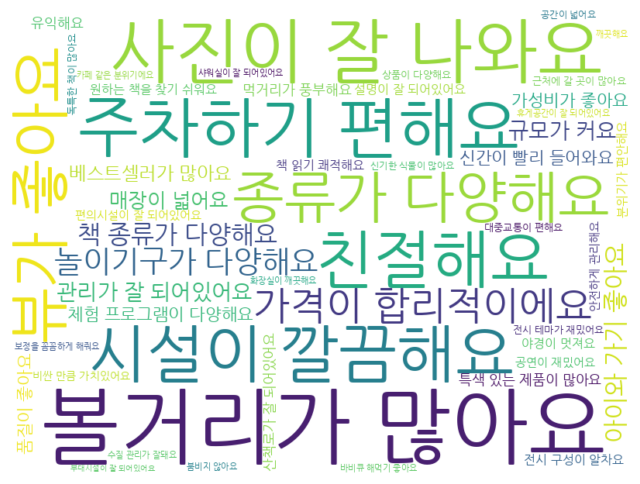

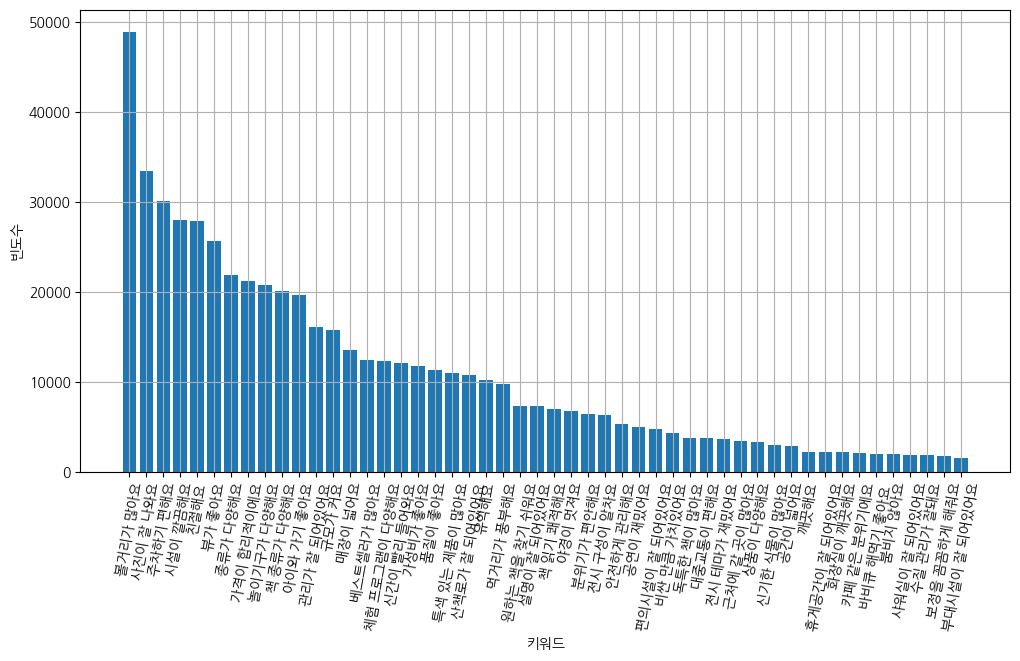

In [104]:
# 'Selected_People' 값이 1 이상인 데이터만 필터링
filtered_df = G_P_Sorted_Counts[G_P_Sorted_Counts['Selected_People'] >= 1]

# 상위 50개 데이터만 선택
filtered_df = filtered_df.head(50)

# Good_Point와 Selected_People를 딕셔너리로 변환
wc = dict(zip(filtered_df['Good_Point'].astype('str'), filtered_df['Selected_People'].astype('int')))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=600,
    background_color='white'
)

wordcloud.generate_from_frequencies(wc)  # generate_from_frequencies() 함수 사용

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 빈도수 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

# 키워드를 빈도수 기준으로 정렬
sorted_keys = sorted(wc, key=wc.get, reverse=True)
sorted_values = sorted(wc.values(), reverse=True)

# 상위 50개 데이터만 사용하여 막대 그래프 그리기
plt.bar(range(len(wc)), sorted_values, align='center')
plt.xticks(range(len(wc)), sorted_keys, rotation=80)
plt.show()

### 피처를 리뷰 분류한것으로 두고 pivot 만드렁보기

In [32]:
Attraction_2

,Attraction,Good_Point,Selected_People,Category_Map,Good_Point_Split_1,Good_Point_Split_2,Good_Point_Split_3,Good_Point_Split_4
0,동대문역사문화공원,뷰가 좋아요,22,경관 및 사진,뷰가,좋아요,NaN,NaN
1,동대문역사문화공원,관리가 잘 되어있어요,21,시설 및 편의성,관리가,잘,되어있어요,NaN
2,동대문역사문화공원,볼거리가 많아요,14,활동 및 즐길거리,볼거리가,많아요,NaN,NaN
3,동대문역사문화공원,사진이 잘 나와요,12,경관 및 사진,사진이,잘,나와요,NaN
4,동대문역사문화공원,산책로가 잘 되어있어요,12,활동 및 즐길거리,산책로가,잘,되어있어요,NaN
...,...,...,...,...,...,...,...,...
5017,한국금융사박물관,설명이 잘 되어있어요,2,서비스,설명이,잘,되어있어요,NaN
5018,한국금융사박물관,주차하기 편해요,2,시설 및 편의성,주차하기,편해요,NaN,NaN
5019,한국금융사박물관,가격이 합리적이에요,1,가격 및 가치,가격이,합리적이에요,NaN,NaN
5020,한국금융사박물관,체험 프로그램이 다양해요,1,활동 및 즐길거리,체험,프로그램이,다양해요,NaN


In [33]:
Feature_Attraction = Attraction_2.copy()

In [34]:
# 피벗 테이블 생성
Pivot_df = Feature_Attraction.pivot_table(
    index='Attraction',
    columns='Category_Map',
    values='Selected_People',
    aggfunc='sum',  # 중복된 경우 합계
    fill_value=0    # NaN 값을 0으로 채움
)

In [35]:
# 결과 출력
Pivot_df

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,활동 및 즐길거리
Attraction,,,,,,,
104고지전적비,37,92,40,26,0,62,106
10꼬르소꼬모 청담점,31,40,0,37,60,20,1
63아트,54,99,0,27,0,157,176
AK PLAZA 홍대,372,52,0,203,532,186,4
IFC몰,1026,11,0,582,1401,954,1
...,...,...,...,...,...,...,...
홍난파가옥,0,11,5,2,0,9,6
화곡본동시장,3,5,0,4,4,6,4
화랑대 철도공원,1,43,8,1,0,41,62


In [36]:
Pivot_df['Total_Feature_Counts'] = Pivot_df.sum(axis=1)

In [37]:
Pivot_df.sort_values(by='Total_Feature_Counts', ascending=False)

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,활동 및 즐길거리,Total_Feature_Counts
Attraction,,,,,,,,
교보문고,0,2022,0,0,43140,23401,27,68590
롯데월드 어드벤처,2051,4008,36,615,0,2862,28157,37729
롯데월드,2051,4008,36,615,0,2862,28157,37729
롯데월드타워 서울스카이,687,19566,0,0,0,7128,4028,31409
코엑스 아쿠아리움,1117,2984,0,1463,0,10766,9543,25873
...,...,...,...,...,...,...,...,...
양재꽃시장,5,0,0,8,2,1,0,16
수도박물관,0,1,0,7,0,2,4,14
고속터미널 꽃도매상가,0,2,0,3,0,1,7,13


In [40]:
Pivot_df.to_csv('네이버_관광_리뷰_카테고리.csv', encoding='cp949')

### 정규화 함 해보까~

In [64]:
Pivot_Feature = Pivot_df.sort_values(by='Total_Feature_Counts', ascending=False).copy()

In [65]:
Pivot_Feature

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,주변 인프라,활동 및 즐길거리,Total_Feature_Counts
Attraction,,,,,,,,,
교보문고,0,2022,0,0,43140,23401,0,27,68590
롯데월드,2051,4008,36,615,0,2862,0,28157,37729
롯데월드 어드벤처,2051,4008,36,615,0,2862,0,28157,37729
롯데월드타워 서울스카이,687,19566,0,0,0,2414,4714,4028,31409
코엑스 아쿠아리움,1117,2984,0,1463,0,10766,0,9543,25873
...,...,...,...,...,...,...,...,...,...
양재꽃시장,5,0,0,8,2,1,0,0,16
수도박물관,0,1,0,7,0,2,0,4,14
고속터미널 꽃도매상가,0,2,0,3,0,1,0,7,13


In [ ]:
#Pivot_Feature.to_csv('Pivot_Feature.csv', encoding='utf-8', index=True)

### 열 정규화 하였음

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 수행
Normalized_df = pd.DataFrame(scaler.fit_transform(Pivot_Feature), columns=Pivot_Feature.columns, index=Pivot_Feature.index)

In [67]:
# 결과 출력
Normalized_df

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,주변 인프라,활동 및 즐길거리,Total_Feature_Counts
Attraction,,,,,,,,,
교보문고,0.000000,0.103343,0.000000,0.000000,1.000000,1.000000,0.0,0.000959,1.000000
롯데월드,0.597785,0.204845,0.065814,0.141087,0.000000,0.122302,0.0,1.000000,0.549993
롯데월드 어드벤처,0.597785,0.204845,0.065814,0.141087,0.000000,0.122302,0.0,1.000000,0.549993
롯데월드타워 서울스카이,0.200233,1.000000,0.000000,0.000000,0.000000,0.103158,1.0,0.143055,0.457837
코엑스 아쿠아리움,0.325561,0.152509,0.000000,0.335627,0.000000,0.460066,0.0,0.338921,0.377113
...,...,...,...,...,...,...,...,...,...
양재꽃시장,0.001457,0.000000,0.000000,0.001835,0.000046,0.000043,0.0,0.000000,0.000073
수도박물관,0.000000,0.000051,0.000000,0.001606,0.000000,0.000085,0.0,0.000142,0.000044
고속터미널 꽃도매상가,0.000000,0.000102,0.000000,0.000688,0.000000,0.000043,0.0,0.000249,0.000029


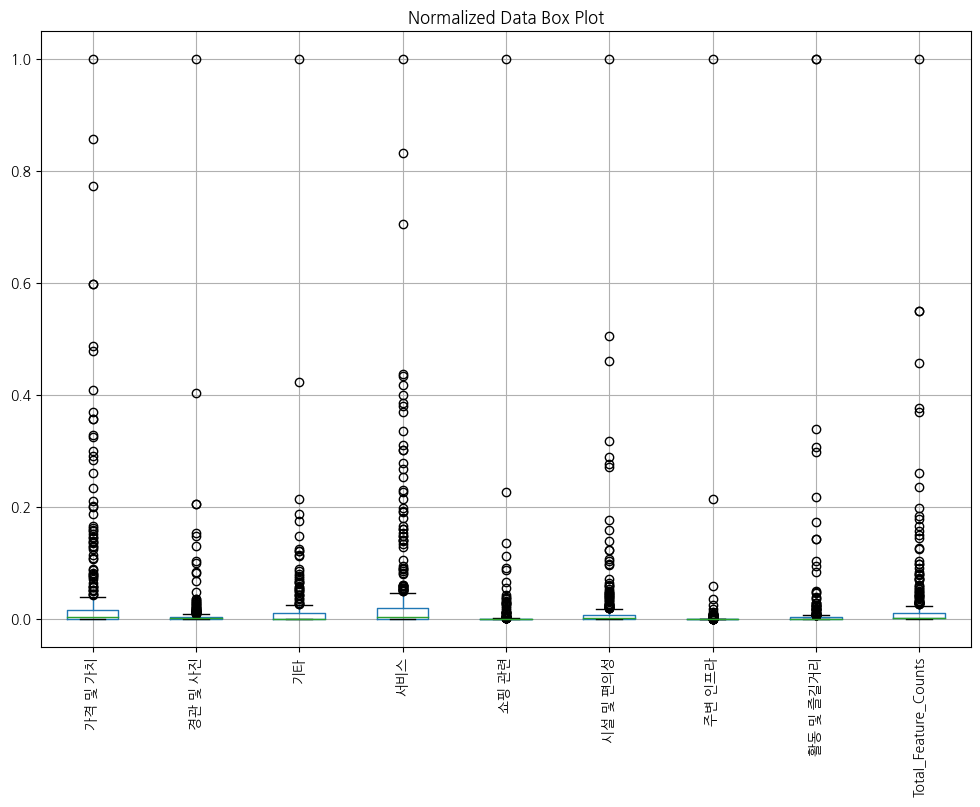

In [68]:
import matplotlib.pyplot as plt

# 박스 플롯 시각화
plt.figure(figsize=(12, 8))
Normalized_df.boxplot()
plt.title('Normalized Data Box Plot')
plt.xticks(rotation=90)
plt.show()

### 각 장소별 %으로 할당 후에 다시 정규화를 해보도록 하자.

In [69]:
Pivot_Feature.columns

Index(['가격 및 가치', '경관 및 사진', '기타', '서비스', '쇼핑 관련', '시설 및 편의성', '주변 인프라',
       '활동 및 즐길거리', 'Total_Feature_Counts'],
      dtype='object', name='Category_Map')

In [70]:
# 백분율 계산
Percentage_Data = Pivot_Feature.copy()

# 특정 컬럼들만 선택하여 백분율 계산
columns_to_calculate = ['가격 및 가치', '경관 및 사진', '기타', '서비스', '쇼핑 관련', '시설 및 편의성', '주변 인프라', '활동 및 즐길거리', 'Total_Feature_Counts']

for column in columns_to_calculate:
    Percentage_Data[column] = (Pivot_Feature[column] / Pivot_Feature['Total_Feature_Counts'])* 100

In [71]:
# 결과 출력
Percentage_Data

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,주변 인프라,활동 및 즐길거리,Total_Feature_Counts
Attraction,,,,,,,,,
교보문고,0.000000,2.947952,0.000000,0.000000,62.895466,34.117218,0.000000,0.039364,100.0
롯데월드,5.436137,10.623128,0.095417,1.630046,0.000000,7.585677,0.000000,74.629595,100.0
롯데월드 어드벤처,5.436137,10.623128,0.095417,1.630046,0.000000,7.585677,0.000000,74.629595,100.0
롯데월드타워 서울스카이,2.187271,62.294247,0.000000,0.000000,0.000000,7.685695,15.008437,12.824350,100.0
코엑스 아쿠아리움,4.317242,11.533259,0.000000,5.654543,0.000000,41.610946,0.000000,36.884010,100.0
...,...,...,...,...,...,...,...,...,...
양재꽃시장,31.250000,0.000000,0.000000,50.000000,12.500000,6.250000,0.000000,0.000000,100.0
수도박물관,0.000000,7.142857,0.000000,50.000000,0.000000,14.285714,0.000000,28.571429,100.0
고속터미널 꽃도매상가,0.000000,15.384615,0.000000,23.076923,0.000000,7.692308,0.000000,53.846154,100.0


In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 수행
Normalized_Percentage_Data = pd.DataFrame(scaler.fit_transform(Percentage_Data), columns=Percentage_Data.columns, index=Percentage_Data.index)

In [73]:
Normalized_Percentage_Data

Category_Map,가격 및 가치,경관 및 사진,기타,서비스,쇼핑 관련,시설 및 편의성,주변 인프라,활동 및 즐길거리,Total_Feature_Counts
Attraction,,,,,,,,,
교보문고,0.000000,0.044640,0.000000,0.000000,0.808632,0.364701,0.000000,0.000483,0.0
롯데월드,0.114445,0.160865,0.003621,0.019262,0.000000,0.081088,0.000000,0.915745,0.0
롯데월드 어드벤처,0.114445,0.160865,0.003621,0.019262,0.000000,0.081088,0.000000,0.915745,0.0
롯데월드타워 서울스카이,0.046048,0.943313,0.000000,0.000000,0.000000,0.082157,0.955082,0.157362,0.0
코엑스 아쿠아리움,0.090889,0.174646,0.000000,0.066818,0.000000,0.444807,0.000000,0.452586,0.0
...,...,...,...,...,...,...,...,...,...
양재꽃시장,0.657895,0.000000,0.000000,0.590835,0.160710,0.066810,0.000000,0.000000,0.0
수도박물관,0.000000,0.108163,0.000000,0.590835,0.000000,0.152709,0.000000,0.350587,0.0
고속터미널 꽃도매상가,0.000000,0.232967,0.000000,0.272693,0.000000,0.082228,0.000000,0.660721,0.0


In [74]:
import numpy as np

# Pivot_Feature 데이터프레임을 numpy 배열로 변환 (벡터화)
vectorized_data = Pivot_Feature.values

# 결과 출력
print(vectorized_data)

[[    0  2022     0 ...     0    27 68590]
 [ 2051  4008    36 ...     0 28157 37729]
 [ 2051  4008    36 ...     0 28157 37729]
 ...
 [    0     2     0 ...     0     7    13]
 [    5     0     0 ...     0     0    12]
 [    1     0     0 ...     0     0    11]]


### 코사인 유사도

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(vectorized_data)

# 결과 확인
print(similarity_matrix)

[[1.         0.66634665 0.66634665 ... 0.71541195 0.87630621 0.94642038]
 [0.66634665 1.         1.         ... 0.97032731 0.71516649 0.72235981]
 [0.66634665 1.         1.         ... 0.97032731 0.71516649 0.72235981]
 ...
 [0.71541195 0.97032731 0.97032731 ... 1.         0.77636654 0.81475195]
 [0.87630621 0.71516649 0.71516649 ... 0.77636654 1.         0.9409703 ]
 [0.94642038 0.72235981 0.72235981 ... 0.81475195 0.9409703  1.        ]]


In [77]:
# 각 문서에 대한 가장 유사한 문서 추천
top_similar_docs = []
for i in range(len(similarity_matrix)):
    similar_doc_indices = sorted(range(len(similarity_matrix[i])), key=lambda x: similarity_matrix[i][x], reverse=True)[1:4]
    top_similar_docs.append(similar_doc_indices)

# 추천 결과 출력
for i, similar_docs in enumerate(top_similar_docs):
    print(f"문서 {i}의 가장 유사한 문서들: {similar_docs}")

문서 0의 가장 유사한 문서들: [13, 126, 210]
문서 1의 가장 유사한 문서들: [2, 19, 147]
문서 2의 가장 유사한 문서들: [2, 19, 147]
문서 3의 가장 유사한 문서들: [117, 144, 285]
문서 4의 가장 유사한 문서들: [7, 5, 109]
문서 5의 가장 유사한 문서들: [4, 109, 7]
문서 6의 가장 유사한 문서들: [218, 46, 38]
문서 7의 가장 유사한 문서들: [4, 5, 109]
문서 8의 가장 유사한 문서들: [231, 159, 174]
문서 9의 가장 유사한 문서들: [66, 27, 31]
문서 10의 가장 유사한 문서들: [175, 3, 285]
문서 11의 가장 유사한 문서들: [211, 88, 216]
문서 12의 가장 유사한 문서들: [69, 83, 86]
문서 13의 가장 유사한 문서들: [210, 0, 80]
문서 14의 가장 유사한 문서들: [187, 276, 297]
문서 15의 가장 유사한 문서들: [260, 37, 238]
문서 16의 가장 유사한 문서들: [42, 152, 63]
문서 17의 가장 유사한 문서들: [46, 45, 38]
문서 18의 가장 유사한 문서들: [19, 8, 1]
문서 19의 가장 유사한 문서들: [1, 2, 147]
문서 20의 가장 유사한 문서들: [72, 310, 48]
문서 21의 가장 유사한 문서들: [68, 137, 29]
문서 22의 가장 유사한 문서들: [129, 201, 202]
문서 23의 가장 유사한 문서들: [344, 161, 61]
문서 24의 가장 유사한 문서들: [67, 35, 63]
문서 25의 가장 유사한 문서들: [287, 227, 55]
문서 26의 가장 유사한 문서들: [125, 265, 94]
문서 27의 가장 유사한 문서들: [31, 9, 274]
문서 28의 가장 유사한 문서들: [53, 17, 45]
문서 29의 가장 유사한 문서들: [92, 137, 68]
문서 30의 가장 유사한 문서들: [116, 2